In [3]:
import numpy as np
import pandas as pd

In [5]:
df = pd.read_csv('spam.csv')

In [6]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [7]:
df.sample(5)


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5459,ham,If you hear a loud scream in about &lt;#&gt; m...,NaN,NaN,NaN
4702,ham,Mmmmmmm *snuggles into you* ...*deep contented...,NaN,NaN,NaN
1520,spam,"URGENT! Your Mobile No was awarded a ?2,000 Bo...",NaN,NaN,NaN
3272,ham,Just finished eating. Got u a plate. NOT lefto...,NaN,NaN,NaN
1810,ham,"Now, whats your house # again ? And do you hav...",NaN,NaN,NaN


In [8]:
df.shape

(5572, 5)

In [9]:
##1. Data Cleaning 

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [12]:
#dropping last 3 columns because most of the values there are null 
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [13]:
df.sample(5)

,v1,v2
4312,ham,"I wasn't well babe, i have swollen glands at m..."
76,ham,Thats cool. i am a gentleman and will treat yo...
2300,ham,Nothin comes to my mind. ? help me buy hanger ...
3477,ham,I can ask around but there's not a lot in term...
1467,ham,I wont touch you with out your permission.


In [15]:
#renaming the col names
df.rename(columns={'v1':'target', 'v2':'text'}, inplace=True)
df.sample(5) 

,target,text
1929,spam,Free 1st week entry 2 TEXTPOD 4 a chance 2 win...
2904,ham,Ha. You don??t know either. I did a a clever b...
2802,spam,FreeMsg>FAV XMAS TONES!Reply REAL
3087,ham,"'Wnevr i wana fal in luv vth my books, My bed ..."
631,ham,Thank u!


In [20]:
#encoding ham and spam values to 0 and 1
from sklearn.preprocessing import LabelEncoder 
encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df['target'])
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [21]:
#checking null values
df.isnull().sum()

target    0
text      0
dtype: int64

In [23]:
#checking duplicate values
df.duplicated().sum()

403

In [27]:
#removing duplicates
df = df.drop_duplicates(keep='first')

In [28]:
df.duplicated().sum()

0

In [31]:
#final shape
df.shape

(5169, 2)

In [35]:
### 2. EDA

In [37]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [39]:
#checking the ratio of spam and ham 
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

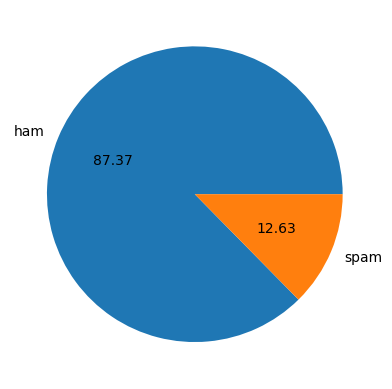

In [46]:
#visualising ham and spam
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels = ['ham', 'spam'], autopct = "%0.2f")
plt.show()

In [47]:
#conlcusion : data is imbalanced

In [48]:
import nltk

In [49]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/devikasood/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [54]:
#counting the number of characters in each message
df['text'].apply(len)

0       111
1        29
2       155
3        49
4        61
       ... 
5567    160
5568     36
5569     57
5570    125
5571     26
Name: text, Length: 5169, dtype: int64

In [56]:
#creating a new column for the number of characters
df['characters'] = df['text'].apply(len)
df.head()

,target,text,characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [58]:
#counting the number of words in each message
df['text'].apply(lambda x:nltk.word_tokenize(x))

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568      [Will, ?, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: text, Length: 5169, dtype: object

In [60]:
#now for counting the num of words, just calculate the lenght of each of these lists, and make a new column 
df['words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [61]:
df.head()

,target,text,characters,words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [63]:
#counting the number of words in each message
df['text'].apply(lambda x:nltk.sent_tokenize(x))

0       [Go until jurong point, crazy.., Available onl...
1                        [Ok lar..., Joking wif u oni...]
2       [Free entry in 2 a wkly comp to win FA Cup fin...
3       [U dun say so early hor... U c already then sa...
4       [Nah I don't think he goes to usf, he lives ar...
                              ...                        
5567    [This is the 2nd time we have tried 2 contact ...
5568              [Will ?, b going to esplanade fr home?]
5569    [Pity, * was in mood for that., So...any other...
5570    [The guy did some bitching but I acted like i'...
5571                        [Rofl., Its true to its name]
Name: text, Length: 5169, dtype: object

In [68]:
df['sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [69]:
df.head()

,target,text,characters,words,sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [71]:
#per sms stats
df[['characters', 'words', 'sentences']].describe()

,characters,words,sentences
count,5169.000000,5169.000000,5169.000000
mean,78.867286,18.561617,2.015477
std,58.172892,13.398589,1.469818
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,2.000000
75%,116.000000,26.000000,3.000000
max,910.000000,220.000000,38.000000


In [72]:
#analysing ham and spam separately 

In [74]:
#ham
df[df['target'] == 0][['characters', 'words', 'sentences']].describe()

,characters,words,sentences
count,4516.000000,4516.000000,4516.000000
mean,70.393933,17.177148,1.875554
std,56.346673,13.526565,1.412181
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [75]:
#spam
df[df['target'] == 1][['characters', 'words', 'sentences']].describe()

,characters,words,sentences
count,653.000000,653.000000,653.000000
mean,137.467075,28.136294,2.983155
std,30.017034,7.130560,1.496834
min,13.000000,2.000000,1.000000
25%,131.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,33.000000,4.000000
max,223.000000,47.000000,9.000000


In [77]:
#conclusions 
#1. spam messages tend to be longer than ham
#2. spam messages use a lot more characters 

In [78]:
import seaborn as sns

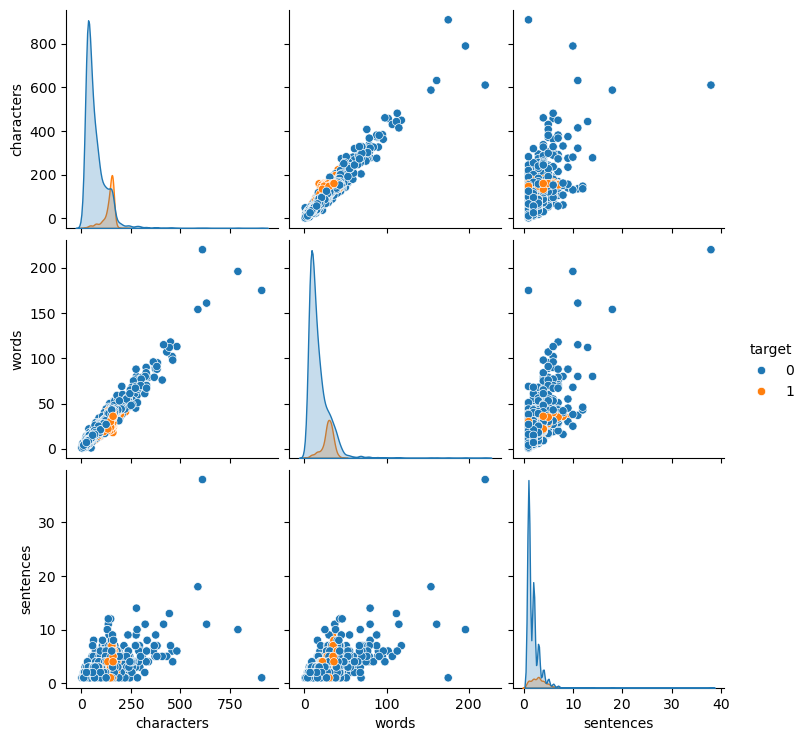

In [92]:
#visualising relationship between the three columns
sns.pairplot(df, hue='target')

<Axes: xlabel='characters', ylabel='Count'>

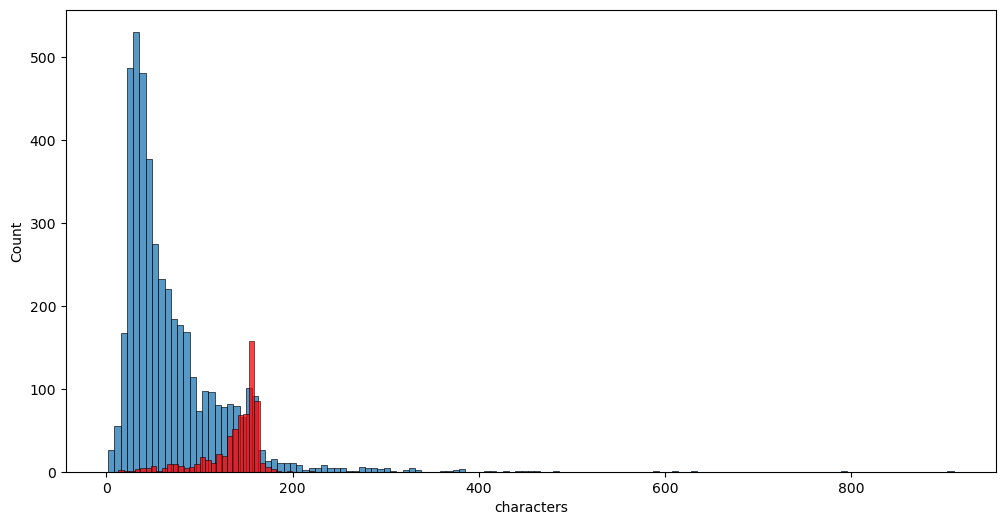

In [87]:
plt.figure(figsize = (12,6))
sns.histplot(df[df['target'] == 0]['characters']) #showing ham
sns.histplot(df[df['target'] == 1]['characters'], color='red') #showing spam 

<Axes: xlabel='words', ylabel='Count'>

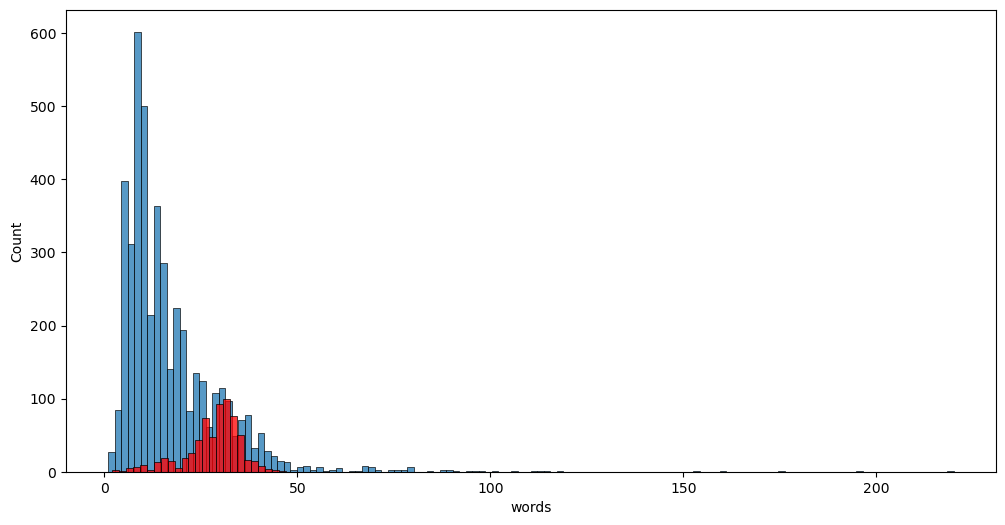

In [88]:
plt.figure(figsize = (12,6))
sns.histplot(df[df['target'] == 0]['words']) #showing ham
sns.histplot(df[df['target'] == 1]['words'], color='red') #showing spam 

<Axes: xlabel='sentences', ylabel='Count'>

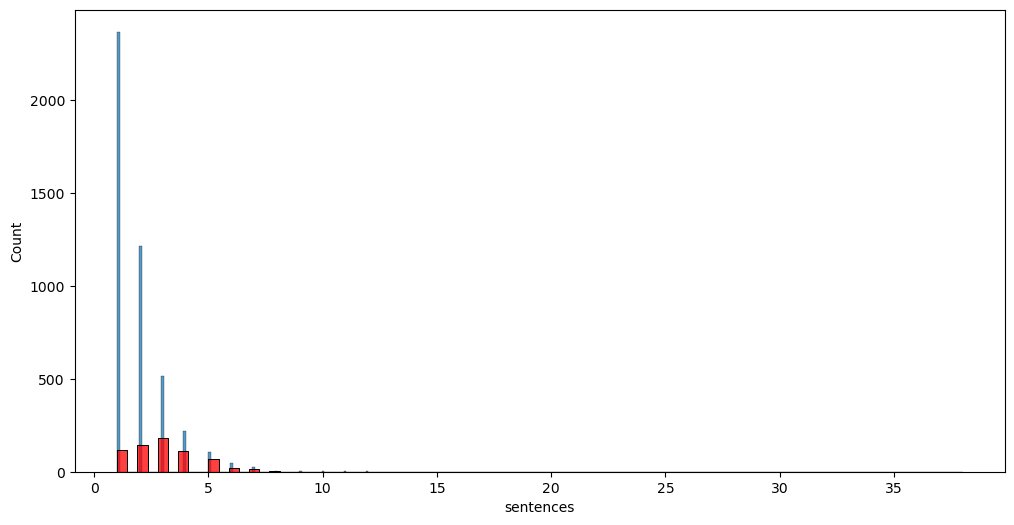

In [89]:
plt.figure(figsize = (12,6))
sns.histplot(df[df['target'] == 0]['sentences']) #showing ham
sns.histplot(df[df['target'] == 1]['sentences'], color='red') #showing spam 

In [104]:
df.select_dtypes(include=['number']).corr()

,target,characters,words,sentences
target,1.000000,0.383087,0.271761,0.250374
characters,0.383087,1.000000,0.967171,0.613463
words,0.271761,0.967171,1.000000,0.673922
sentences,0.250374,0.613463,0.673922,1.000000


<Axes: >

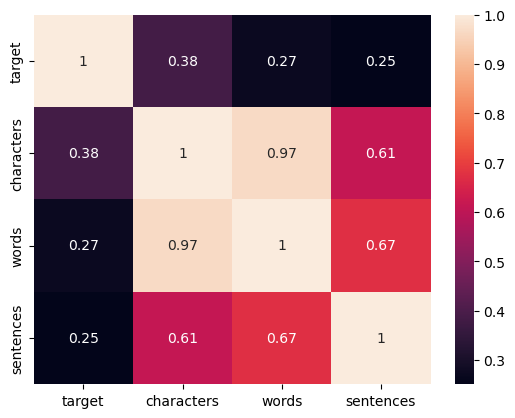

In [107]:
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True)

In [108]:
#the number of characters, words and sentences are highly correlated with each other.
#so for model building, it is best to chgoose only 1 of these. 
#since out of the threee, the numbver of characters has the highest correcxation with the target (0.38), so we choose that

In [112]:
### 3 DATA PREPROCESSING / TEXT PREPROCESSING 
#1. lower case
#2. tokenisation
#3. removing special characters
#4. removing stop words and ounctuation
#5. stemming

In [118]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/devikasood/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [119]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [121]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [130]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

def transform_text(text):
    #1.
    text = text.lower()
    #2.
    text = nltk.word_tokenize(text)
    #3.
    y=[]
    for i in text:
        if i.isalnum(): #if i is alpha numeric
            y.append(i)
            
    text = y[:]
    y.clear()
    #4.
    for i in text:
         if i not in stopwords.words('english') and i not in string.punctuation:
             y.append(i)
    
    text = y[:]
    y.clear()
    #5.
    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)
    

In [133]:
#testing it 
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [134]:
transform_text(df['text'][10])

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [136]:
#transforming our data set text
df['text'].apply(transform_text)

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri 2 wkli comp win fa cup final tkt 21...
3                     u dun say earli hor u c alreadi say
4                    nah think goe usf live around though
                              ...                        
5567    2nd time tri 2 contact u 750 pound prize 2 cla...
5568                                b go esplanad fr home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: text, Length: 5169, dtype: object

In [138]:
df['trans_text'] = df['text'].apply(transform_text)
df.head()

,target,text,characters,words,sentences,trans_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [139]:
#generating word clouds for ham adn spam 

In [156]:
import sys
print(sys.executable)

/opt/homebrew/anaconda3/bin/python


In [157]:
!/opt/homebrew/anaconda3/bin/python/ -m pip install wordcloud

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.4/169.4 kB 2.1 MB/s eta 0:00:00a 0:00:01


In [175]:
from wordcloud import WordCloud
wc = WordCloud(width=1000, height=800, min_font_size=10, background_color='white')

In [178]:
#for spam
spam_wc = wc.generate(df[df['target']==1]['trans_text'].str.cat(sep=" "))

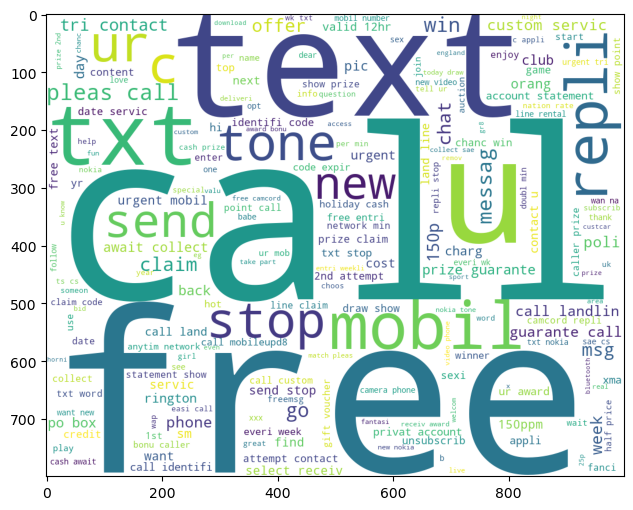

In [179]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

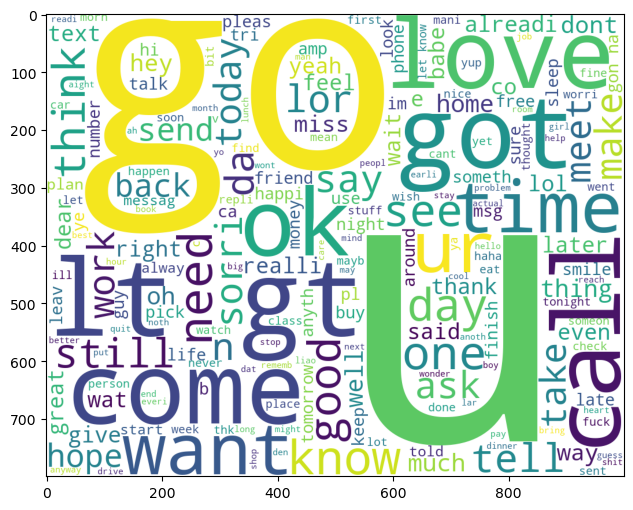

In [181]:
#for ham
ham_wc = wc.generate(df[df['target']==0]['trans_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [321]:
#top 30 words

In [189]:
ls = df[df['target']==1]['trans_text'].tolist()
ls

['free entri 2 wkli comp win fa cup final tkt 21st may text fa 87121 receiv entri question std txt rate c appli 08452810075over18',
 'freemsg hey darl 3 week word back like fun still tb ok xxx std chg send rcv',
 'winner valu network custom select receivea 900 prize reward claim call claim code kl341 valid 12 hour',
 'mobil 11 month u r entitl updat latest colour mobil camera free call mobil updat co free 08002986030',
 'six chanc win cash 100 pound txt csh11 send cost 6day tsandc appli repli hl 4 info',
 'urgent 1 week free membership prize jackpot txt word claim 81010 c lccltd pobox 4403ldnw1a7rw18',
 'xxxmobilemovieclub use credit click wap link next txt messag click http',
 'england v macedonia dont miss news txt ur nation team 87077 eg england 87077 tri wale scotland poboxox36504w45wq',
 'thank subscript rington uk mobil charg pleas confirm repli ye repli charg',
 '07732584351 rodger burn msg tri call repli sm free nokia mobil free camcord pleas call 08000930705 deliveri tomorrow'

In [191]:
spam_corpus = []
for msg in ls:
    for word in msg.split():
        spam_corpus.append(word)
spam_corpus

['free',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'appli',
 '08452810075over18',
 'freemsg',
 'hey',
 'darl',
 '3',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 'rcv',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 '900',
 'prize',
 'reward',
 'claim',
 'call',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'mobil',
 '11',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'mobil',
 'updat',
 'co',
 'free',
 '08002986030',
 'six',
 'chanc',
 'win',
 'cash',
 '100',
 'pound',
 'txt',
 'csh11',
 'send',
 'cost',
 '6day',
 'tsandc',
 'appli',
 'repli',
 'hl',
 '4',
 'info',
 'urgent',
 '1',
 'week',
 'free',
 'membership',
 'prize',
 'jackpot',
 'txt',
 'word',
 'claim',
 '81010',
 'c',
 'lccltd',
 'pobox',
 '

In [192]:
len(spam_corpus)

10150

In [218]:
from collections import Counter
df1 = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['word', 'freq'])
df1

,word,freq
0,call,325
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,120
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


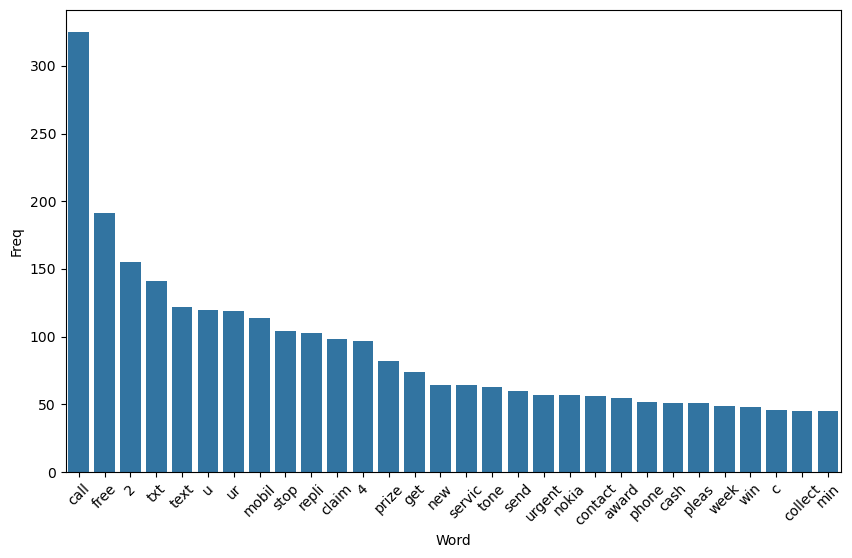

In [219]:
plt.figure(figsize=(10, 6))
sns.barplot(x='word', y='freq', data=df1)
plt.xlabel('Word')
plt.ylabel('Freq')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [221]:
ls = df[df['target']==0]['trans_text'].tolist()
ls

['go jurong point crazi avail bugi n great world la e buffet cine got amor wat',
 'ok lar joke wif u oni',
 'u dun say earli hor u c alreadi say',
 'nah think goe usf live around though',
 'even brother like speak treat like aid patent',
 'per request mell oru minnaminungint nurungu vettam set callertun caller press 9 copi friend callertun',
 'gon na home soon want talk stuff anymor tonight k cri enough today',
 'search right word thank breather promis wont take help grant fulfil promis wonder bless time',
 'date sunday',
 'oh k watch',
 'eh u rememb 2 spell name ye v naughti make v wet',
 'fine way u feel way gota b',
 'serious spell name',
 'go tri 2 month ha ha joke',
 'pay first lar da stock comin',
 'aft finish lunch go str lor ard 3 smth lor u finish ur lunch alreadi',
 'ffffffffff alright way meet sooner',
 'forc eat slice realli hungri tho suck mark get worri know sick turn pizza lol',
 'lol alway convinc',
 'catch bu fri egg make tea eat mom left dinner feel love',
 'back amp 

In [222]:
ham_corpus = []
for msg in ls:
    for word in msg.split():
        ham_corpus.append(word)
ham_corpus

['go',
 'jurong',
 'point',
 'crazi',
 'avail',
 'bugi',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'cine',
 'got',
 'amor',
 'wat',
 'ok',
 'lar',
 'joke',
 'wif',
 'u',
 'oni',
 'u',
 'dun',
 'say',
 'earli',
 'hor',
 'u',
 'c',
 'alreadi',
 'say',
 'nah',
 'think',
 'goe',
 'usf',
 'live',
 'around',
 'though',
 'even',
 'brother',
 'like',
 'speak',
 'treat',
 'like',
 'aid',
 'patent',
 'per',
 'request',
 'mell',
 'oru',
 'minnaminungint',
 'nurungu',
 'vettam',
 'set',
 'callertun',
 'caller',
 'press',
 '9',
 'copi',
 'friend',
 'callertun',
 'gon',
 'na',
 'home',
 'soon',
 'want',
 'talk',
 'stuff',
 'anymor',
 'tonight',
 'k',
 'cri',
 'enough',
 'today',
 'search',
 'right',
 'word',
 'thank',
 'breather',
 'promis',
 'wont',
 'take',
 'help',
 'grant',
 'fulfil',
 'promis',
 'wonder',
 'bless',
 'time',
 'date',
 'sunday',
 'oh',
 'k',
 'watch',
 'eh',
 'u',
 'rememb',
 '2',
 'spell',
 'name',
 'ye',
 'v',
 'naughti',
 'make',
 'v',
 'wet',
 'fine',
 'way',
 'u',
 

In [223]:
len(ham_corpus)

35333

In [224]:
df2 = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['word', 'freq'])
df2

,word,freq
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287
5,2,284
6,come,275
7,got,236
8,know,236
9,like,234


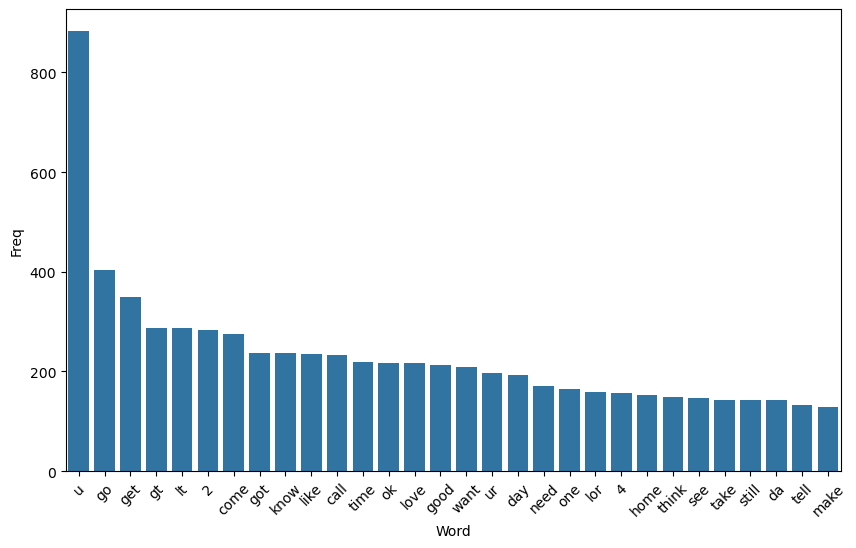

In [225]:
plt.figure(figsize=(10, 6))
sns.barplot(x='word', y='freq', data=df2)
plt.xlabel('Word')
plt.ylabel('Freq')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [229]:
### 4. MODEL BUILDING 

In [230]:
df.head()

,target,text,characters,words,sentences,trans_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [232]:
#input is text, output (target) is numerical, so we have to vectorise the text
#1.bag of words

In [233]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [352]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, f1_score

In [408]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=2)

In [375]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

In [376]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [377]:
gnb.fit(x_train,y_train)
y_pred1 = gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))
print(f1_score(y_test,y_pred1))

0.879110251450677
[[790 106]
 [ 19 119]]
0.5288888888888889
0.6556473829201102


In [378]:
mnb.fit(x_train,y_train)
y_pred2 = mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))
print(f1_score(y_test,y_pred2))

0.965183752417795
[[872  24]
 [ 12 126]]
0.84
0.875


In [379]:
bnb.fit(x_train,y_train)
y_pred3 = bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))
print(f1_score(y_test,y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283
0.8764940239043825


In [386]:
#trying tfidf to see if precision score improves

In [280]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()

In [281]:
x1 = tfidf.fit_transform(df['trans_text']).toarray()
x1

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [283]:
x1.shape

(5169, 6702)

In [294]:
y = df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [295]:
x1_train, x1_test, y_train, y_test = train_test_split(x1,y,test_size=0.2, random_state=2)

In [380]:
from sklearn.svm import SVC

In [381]:
svc_sig = SVC(kernel='sigmoid', gamma=1.0)
svc_lin = SVC(kernel='linear', gamma=1.0)
svc_rbf = SVC(kernel='rbf', gamma=1.0)

In [382]:
svc_sig.fit(x1_train, y_train)
y_pred1 = svc_sig.predict(x1_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))
print(f1_score(y_test,y_pred1))

0.9758220502901354
[[893   3]
 [ 22 116]]
0.9747899159663865
0.9027237354085603


In [383]:
svc_lin.fit(x1_train, y_train)
y_pred2 = svc_lin.predict(x1_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))
print(f1_score(y_test,y_pred2))

0.9777562862669246
[[893   3]
 [ 20 118]]
0.9752066115702479
0.9111969111969112


In [384]:
svc_rbf.fit(x1_train, y_train)
y_pred3 = svc_rbf.predict(x1_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))
print(f1_score(y_test,y_pred3))

0.9680851063829787
[[894   2]
 [ 31 107]]
0.981651376146789
0.8663967611336032


In [388]:
#tfidf is a better vecrtorizer here, coupled with linear svc, as linear svc has slightly better f1 score(important to consider for imbalanced data). also, the data has a ROUGHLY linear relationship. so linear svc

In [390]:
svc_lin1 = SVC(kernel='sigmoid', gamma=0.1)

In [391]:
svc_lin1.fit(x1_train, y_train)
y_pred2 = svc_lin1.predict(x1_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))
print(f1_score(y_test,y_pred2))

0.9090909090909091
[[895   1]
 [ 93  45]]
0.9782608695652174
0.4891304347826087


In [394]:
svc_lin2 = SVC(kernel='sigmoid', gamma=0.5)

In [395]:
svc_lin2.fit(x1_train, y_train)
y_pred2 = svc_lin2.predict(x1_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))
print(f1_score(y_test,y_pred2))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283
0.8764940239043825


In [389]:
#let's see other famous classicification alogs

In [385]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import f1_score

In [397]:
svc = SVC(kernel='linear', gamma=1.0)
knc = KNeighborsClassifier()
bnb = BernoulliNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)

In [398]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': bnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
}

In [399]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    f1score = f1_score(y_test,y_pred)
    return accuracy,precision, f1score

In [400]:
train_classifier(svc,x1_train,y_train,x1_test,y_test)

(0.9777562862669246, 0.9752066115702479, 0.9111969111969112)

In [401]:
accuracy_scores = []
precision_scores = []
f1_scores = []

for name,clf in clfs.items():
    
    current_accuracy, current_precision, current_f1score = train_classifier(clf, x1_train,y_train,x1_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    print("F1 score - ",current_f1score)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    f1_scores.append(current_f1score)

For  SVC
Accuracy -  0.9777562862669246
Precision -  0.9752066115702479
F1 score -  0.9111969111969112
For  KN
Accuracy -  0.8994197292069632
Precision -  1.0
F1 score -  0.3953488372093023
For  NB
Accuracy -  0.9700193423597679
Precision -  0.9734513274336283
F1 score -  0.8764940239043825
For  DT
Accuracy -  0.9361702127659575
Precision -  0.839622641509434
F1 score -  0.7295081967213115
For  LR
Accuracy -  0.9526112185686654
Precision -  0.9494949494949495
F1 score -  0.7932489451476793
For  RF
Accuracy -  0.9700193423597679
Precision -  1.0
F1 score -  0.8734693877551021


/opt/homebrew/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For  AdaBoost
Accuracy -  0.9622823984526112
Precision -  0.9230769230769231
F1 score -  0.8470588235294118
For  BgC
Accuracy -  0.9622823984526112
Precision -  0.8837209302325582
F1 score -  0.8539325842696629
For  ETC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
F1 score -  0.8984375
For  GBDT
Accuracy -  0.9526112185686654
Precision -  0.908256880733945
F1 score -  0.8016194331983806


In [402]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores, 'F1_Score':f1_scores}).sort_values('F1_Score',ascending=False)
performance_df

,Algorithm,Accuracy,Precision,F1_Score
0,SVC,0.977756,0.975207,0.911197
8,ETC,0.974855,0.974576,0.898438
2,NB,0.970019,0.973451,0.876494
5,RF,0.970019,1.000000,0.873469
7,BgC,0.962282,0.883721,0.853933
6,AdaBoost,0.962282,0.923077,0.847059
9,GBDT,0.952611,0.908257,0.801619
4,LR,0.952611,0.949495,0.793249
3,DT,0.936170,0.839623,0.729508
1,KN,0.899420,1.000000,0.395349


In [403]:
performance_df1 = performance_df.melt(id_vars='Algorithm', var_name='metric', value_name='Score')

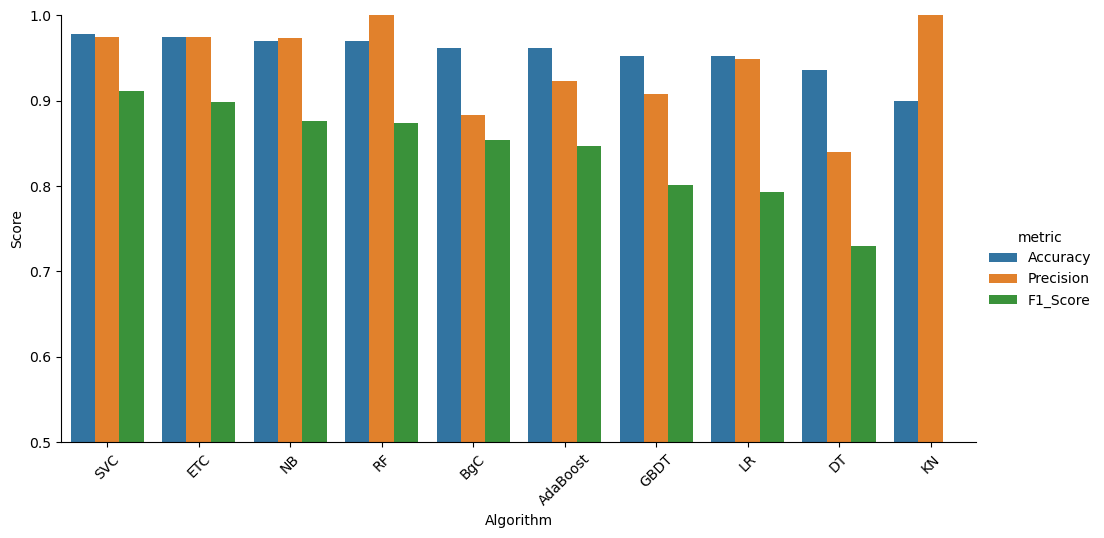

In [404]:
sns.catplot(x = 'Algorithm', y='Score', hue = 'metric',data=performance_df1, kind='bar',height=5, aspect = 2)
plt.ylim(0.5,1.0)
plt.xticks(rotation=45)
plt.show()

In [405]:
#trying oversampling technique smote to see if f1 score betters

In [406]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [407]:
from imblearn.over_sampling import SMOTE

In [409]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [410]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [412]:
svc_lin.fit(X_train_resampled, y_train_resampled)
y_predd = svc_lin.predict(X_test)
print(accuracy_score(y_test, y_predd))
print(confusion_matrix(y_test, y_predd))
print(precision_score(y_test, y_predd))
print(f1_score(y_test,y_predd))

0.8955512572533849
[[801  88]
 [ 20 125]]
0.5868544600938967
0.6983240223463687


In [413]:
svc_sig.fit(X_train_resampled, y_train_resampled)
y_predd = svc_sig.predict(X_test)
print(accuracy_score(y_test, y_predd))
print(confusion_matrix(y_test, y_predd))
print(precision_score(y_test, y_predd))
print(f1_score(y_test,y_predd))

0.7998065764023211
[[704 185]
 [ 22 123]]
0.39935064935064934
0.543046357615894


In [414]:
#conclusion: poor results 

In [415]:
import pickle

In [418]:
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(svc,open('model1.pkl','wb'))
pickle.dump(etc, open('model2.pkl', 'wb'))
pickle.dump(bnb, open('model3.pkl', 'wb'))